# Performance of single priority dispatching rules

This notebook presents an implementation of different single dispatching rules and their performance in a competitive evaluation.

# Prepare programming environment

## Load necessary packages

In [1]:
# Import packages
import sys
import pandas as pd
import seaborn as sns
import pickle
from tqdm.notebook import tqdm
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from datetime import datetime
from time import mktime

tqdm.pandas()

sys.path.append("..")
from src.simulation import assign_priority_edd, assign_priority_mdd, assign_priority_spt, assign_priority_srpt, \
    assign_priority_lpt, assign_priority_cr, assign_priority_ds, assign_priority_fifo

## Get required data

In [2]:
# Load the training data
with open(r"../data/processed/data_processed_classification_training.pickle", "rb") as output_file:
    data_train = pickle.load(output_file)

In [3]:
# Load data required for simulation
product_types_df = pd.read_csv("../data/external/product_types.csv")
product_types_df = product_types_df[product_types_df.id != 2]
with open(r"../data/interim/sim_data.pickle", "rb") as output_file:
    orders_df = pickle.load(output_file)
machines_df = pd.read_csv("../data/external/machine.csv")
machines_df = machines_df[machines_df.product_type_id != 2]

## Define constants

In [4]:
# Define constants for model training
RANDOM_STATE = 42

In [5]:
# Define constants for simulation
priority_rules = {"edd": assign_priority_edd,
                  "spt": assign_priority_spt,
                  "srpt": assign_priority_srpt,
                  "fifo": assign_priority_fifo,
                  "cr": assign_priority_cr,
                  "mdd": assign_priority_mdd,
                  "lpt": assign_priority_lpt,
                  "ds": assign_priority_ds}
SIMULATION_START = mktime(datetime(2022, 11, 14, 5, 0, 0).timetuple()) * 1000
due_date_range_list = [(3, 10), (5, 14), (7, 21)]
number_orders_start_list = [80, 90, 100, 110]
average_count_new_orders_list = [80, 90, 100, 110]
worker_list =  [40, 50, 60, 70]
random_states = [100, 101, 102]

# Model training

In [6]:
# Define features and target
X = data_train.drop("priority_rule_score",  axis = 1)
y = data_train[["priority_rule_score"]]

In [7]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

To check how single dispatching rules are performing we are creating simple dummy classifier that always only predict one dispatching rule.

In [8]:
# Simple dummy classifier for the earliest due date heuristic
dummy_edd = DummyClassifier(strategy="constant", constant = 'edd')
dummy_edd_fit = dummy_edd.fit(X_train, y_train)

In [9]:
# Simple dummy classifier for the shortest processing time heuristic
dummy_spt = DummyClassifier(strategy="constant", constant = "spt")
dummy_spt_fit = dummy_spt.fit(X_train, y_train)

In [10]:
# Simple dummy classifier for the shortest remaining processing time heuristic
dummy_srpt = DummyClassifier(strategy="constant", constant = "srpt")
dummy_srpt_fit = dummy_srpt.fit(X_train, y_train)

In [11]:
# Simple dummy classifier for the first in first out heuristic
dummy_fifo = DummyClassifier(strategy="constant", constant = "fifo")
dummy_fifo_fit = dummy_fifo.fit(X_train, y_train)

In [12]:
# Simple dummy classifier for the critical ration heuristic
dummy_cr = DummyClassifier(strategy="constant", constant = "cr")
dummy_cr_fit = dummy_cr.fit(X_train, y_train)

In [13]:
# Simple dummy classifier for the modified due date heuristic
dummy_mdd = DummyClassifier(strategy="constant", constant = "mdd")
dummy_mdd_fit = dummy_mdd.fit(X_train, y_train)

In [14]:
# Simple dummy classifier for the longest processing time heuristic
dummy_lpt = DummyClassifier(strategy="constant", constant = "lpt")
dummy_lpt_fit = dummy_lpt.fit(X_train, y_train)

In [15]:
# Simple dummy classifier for minimal slack heuristic
dummy_ds = DummyClassifier(strategy="constant", constant = "ds")
dummy_ds_fit = dummy_ds.fit(X_train, y_train)

# Evaluation in simulation environment

In this section we define a simulation testing environment for testing and comparing the performance of different approaches. For this we create use repeated simulation of a factory with varying experiment settings. The trained algorithm are then used in the process to select dispatching rules.

In [16]:
# Execute simulation for edd
# Duration ~ 8 minutes
# simulation_results_edd = run_simulation_complete(dummy_edd_fit, priority_rules, random_states, due_date_range_list,
#                                              number_orders_start_list,
#                                              average_count_new_orders_list, worker_list, "EDD",
#                                              product_types_df, machines_df, orders_df, SIMULATION_START)
# simulation_results_edd.to_csv("../data/processed/simulation_results_validation_edd.csv", index = False)

In [17]:
# Evaluate simulation for edd
simulation_results_edd = pd.read_csv("../data/processed/evaluation/simulation_results_validation_edd.csv")
simulation_results_edd["profit"] = simulation_results_edd["revenue"] - simulation_results_edd["penalty"]
print(f"Mean profit of edd: {simulation_results_edd['profit'].mean()}")

Mean profit of edd: 8099.138602171064


In [18]:
# Execute simulation for spt
# Duration ~ 8 minutes
# simulation_results_spt = run_simulation_complete(dummy_spt_fit, priority_rules, random_states, due_date_range_list,
#                                              number_orders_start_list,
#                                              average_count_new_orders_list, worker_list, "SPT",
#                                              product_types_df, machines_df, orders_df, SIMULATION_START)
# simulation_results_spt.to_csv("../data/processed/simulation_results_validation_spt.csv", index = False)

In [19]:
# Evaluate simulation for spt
simulation_results_spt = pd.read_csv("../data/processed/evaluation/simulation_results_validation_spt.csv")
simulation_results_spt["profit"] = simulation_results_spt["revenue"] - simulation_results_spt["penalty"]
print(f"Mean profit of spt: {simulation_results_spt['profit'].mean()}")

Mean profit of spt: 7611.61894146788


In [20]:
# Execute simulation for srpt
# Duration ~ 8 minutes
# simulation_results_srpt = run_simulation_complete(dummy_srpt_fit, priority_rules, random_states, due_date_range_list,
#                                              number_orders_start_list,
#                                              average_count_new_orders_list, worker_list, "SRPT",
#                                              product_types_df, machines_df, orders_df, SIMULATION_START)
# simulation_results_srpt.to_csv("../data/processed/simulation_results_validation_srpt.csv", index = False)

In [21]:
# Evaluate simulation for srpt
simulation_results_srpt = pd.read_csv("../data/processed/evaluation/simulation_results_validation_srpt.csv")
simulation_results_srpt["profit"] = simulation_results_srpt["revenue"] - simulation_results_srpt["penalty"]
print(f"Mean profit of srpt: {simulation_results_srpt['profit'].mean()}")

Mean profit of srpt: 7703.917637772047


In [22]:
# Execute simulation for fifo
# Duration ~ 8 minutes
# simulation_results_fifo = run_simulation_complete(dummy_fifo_fit, priority_rules, random_states, due_date_range_list,
#                                              number_orders_start_list,
#                                              average_count_new_orders_list, worker_list, "FIFO",
#                                              product_types_df, machines_df, orders_df, SIMULATION_START)
# simulation_results_fifo.to_csv("../data/processed/simulation_results_validation_fifo.csv", index = False)

In [23]:
# Evaluate simulation for fifo
simulation_results_fifo = pd.read_csv("../data/processed/evaluation/simulation_results_validation_fifo.csv")
simulation_results_fifo["profit"] = simulation_results_fifo["revenue"] - simulation_results_fifo["penalty"]
print(f"Mean profit of fifo: {simulation_results_fifo['profit'].mean()}")

Mean profit of fifo: 8004.028661748148


In [24]:
# Execute simulation for cr
# Duration ~ 8 minutes
# simulation_results_cr = run_simulation_complete(dummy_cr_fit, priority_rules, random_states, due_date_range_list,
#                                              number_orders_start_list,
#                                              average_count_new_orders_list, worker_list, "CR",
#                                              product_types_df, machines_df, orders_df, SIMULATION_START)
# simulation_results_cr.to_csv("../data/processed/simulation_results_validation_cr.csv", index = False)

In [25]:
# Evaluate simulation for cr
simulation_results_cr = pd.read_csv("../data/processed/evaluation/simulation_results_validation_cr.csv")
simulation_results_cr["profit"] = simulation_results_cr["revenue"] - simulation_results_cr["penalty"]
print(f"Mean profit of cr: {simulation_results_cr['profit'].mean()}")

Mean profit of cr: 7178.952699551677


In [26]:
# Execute simulation for mdd
# Duration ~ 8 minutes
# simulation_results_mdd = run_simulation_complete(dummy_mdd_fit, priority_rules, random_states, due_date_range_list,
#                                              number_orders_start_list,
#                                              average_count_new_orders_list, worker_list, "MDD",
#                                              product_types_df, machines_df, orders_df, SIMULATION_START)
# simulation_results_mdd.to_csv("../data/processed/simulation_results_validation_mdd.csv", index = False)

In [27]:
# Evaluate simulation for mdd
simulation_results_mdd = pd.read_csv("../data/processed/evaluation/simulation_results_validation_mdd.csv")
simulation_results_mdd["profit"] = simulation_results_mdd["revenue"] - simulation_results_mdd["penalty"]
print(f"Mean profit of mdd: {simulation_results_mdd['profit'].mean()}")

Mean profit of mdd: 8278.293139511401


In [28]:
# Execute simulation for lpt
# Duration ~ 8 minutes
# simulation_results_lpt = run_simulation_complete(dummy_lpt_fit, priority_rules, random_states, due_date_range_list,
#                                              number_orders_start_list,
#                                              average_count_new_orders_list, worker_list, "LPT",
#                                              product_types_df, machines_df, orders_df, SIMULATION_START)
# simulation_results_lpt.to_csv("../data/processed/simulation_results_validation_lpt.csv", index = False)

In [29]:
# Evaluate simulation for lpt
simulation_results_lpt = pd.read_csv("../data/processed/evaluation/simulation_results_validation_lpt.csv")
simulation_results_lpt["profit"] = simulation_results_lpt["revenue"] - simulation_results_lpt["penalty"]
print(f"Mean profit of lpt: {simulation_results_lpt['profit'].mean()}")

Mean profit of lpt: 7343.1024861200185


In [30]:
# Execute simulation for ds
# Duration ~ 8 minutes
# simulation_results_ds = run_simulation_complete(dummy_ds_fit, priority_rules, random_states, due_date_range_list,
#                                              number_orders_start_list,
#                                              average_count_new_orders_list, worker_list, "DS",
#                                              product_types_df, machines_df, orders_df, SIMULATION_START)
# simulation_results_ds.to_csv("../data/processed/simulation_results_validation_ds.csv", index = False)

In [31]:
# Evaluate simulation for ds
simulation_results_ds = pd.read_csv("../data/processed/evaluation/simulation_results_validation_ds.csv")
simulation_results_ds["profit"] = simulation_results_ds["revenue"] - simulation_results_ds["penalty"]
print(f"Mean profit of ds: {simulation_results_ds['profit'].mean()}")

Mean profit of ds: 7297.4310395572875


<AxesSubplot: xlabel='day', ylabel='profit'>

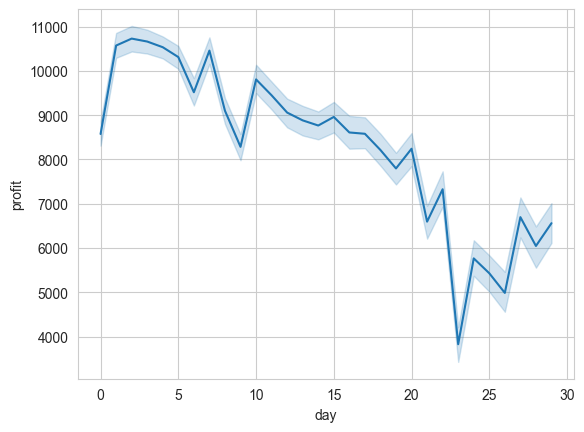

In [32]:
# Visualize profit of best performing rule
sns.lineplot(simulation_results_mdd, x = "day", y = "profit")

<AxesSubplot: xlabel='day', ylabel='profit'>

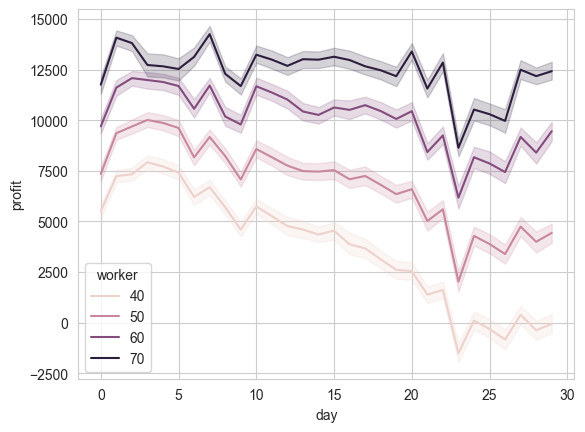

In [33]:
# Visualize profit per worker constellation of best performing rule
sns.lineplot(simulation_results_mdd, x = "day", y = "profit", hue = "worker")

<AxesSubplot: xlabel='day', ylabel='profit'>

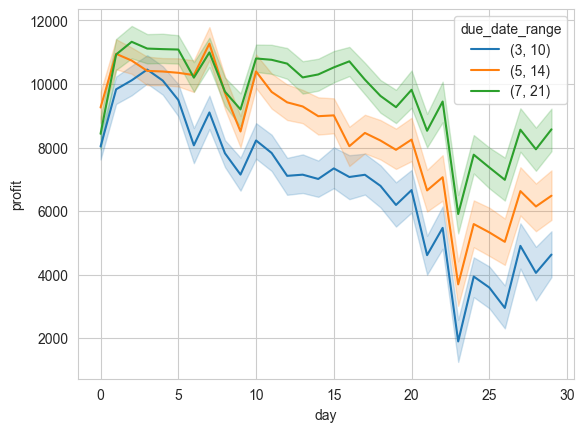

In [34]:
# Visualize profit per due date constellation of best performing rule
sns.lineplot(simulation_results_mdd, x = "day", y = "profit", hue = "due_date_range")

<AxesSubplot: xlabel='day', ylabel='profit'>

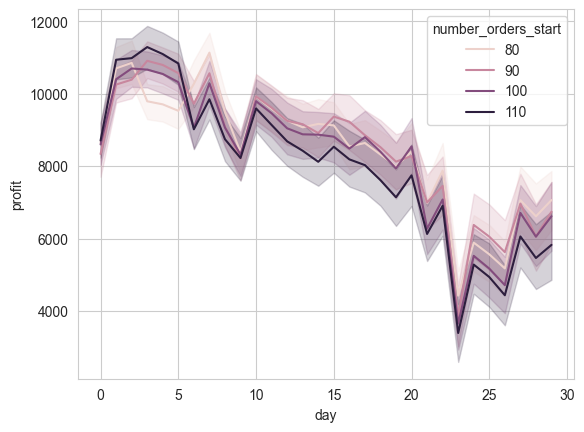

In [35]:
# Visualize profit per number_orders_start constellation of best performing rule
sns.lineplot(simulation_results_mdd, x = "day", y = "profit", hue = "number_orders_start")

<AxesSubplot: xlabel='day', ylabel='profit'>

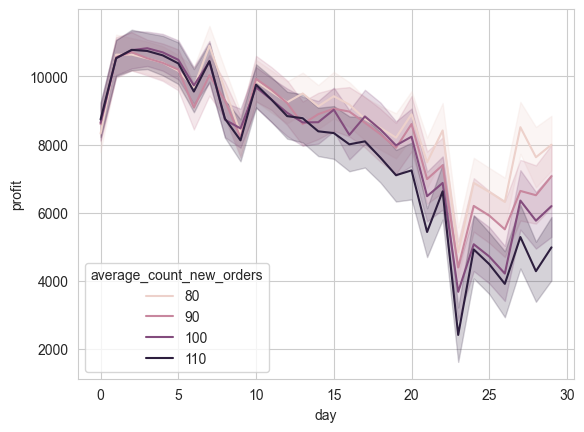

In [36]:
# Visualize profit per average count new orders constellation of best performing rule
sns.lineplot(simulation_results_mdd, x = "day", y = "profit", hue = "average_count_new_orders")

The decreasing trend of the profit is expected as we purposefully created a challenging scenarios with increasing due date pressure to enable the algorithm to learn more on fewer data.